In [26]:
from HB_lattice import *
latt = HB_lattice()

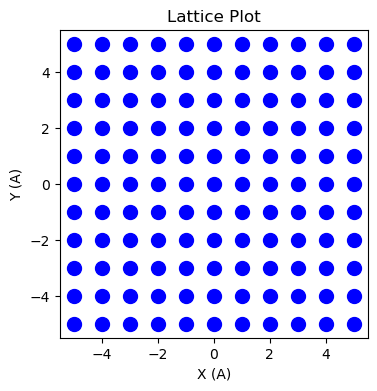

In [30]:
latt.create_lattice('square', 10, 1)
# latt.create_custom_lattice("coords.csv")
latt.plot_lattice()

In [35]:
latt.hamiltonian_hopping([0.2, 0.1, 0.05])
# latt.hamiltonian_interpolate(0.2, 10)
latt.ham_matrix[:4, :4].real

Hamiltonian will be constructd with hopping: [0.2, 0.1, 0.05]


array([[0.  , 0.2 , 0.1 , 0.05],
       [0.2 , 0.  , 0.2 , 0.1 ],
       [0.1 , 0.2 , 0.  , 0.2 ],
       [0.05, 0.1 , 0.2 , 0.  ]])

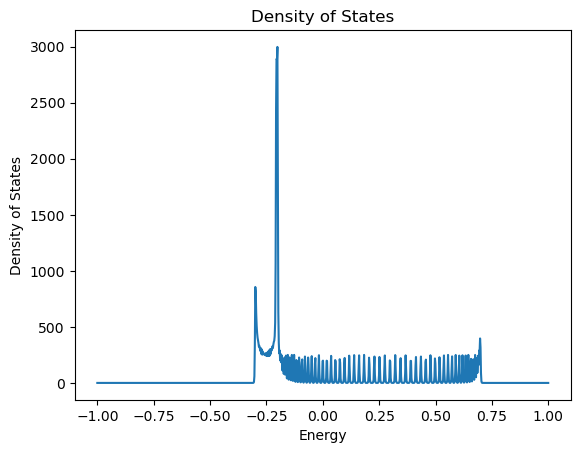

In [36]:
latt.plot_dos(-1, 1, 0.001)

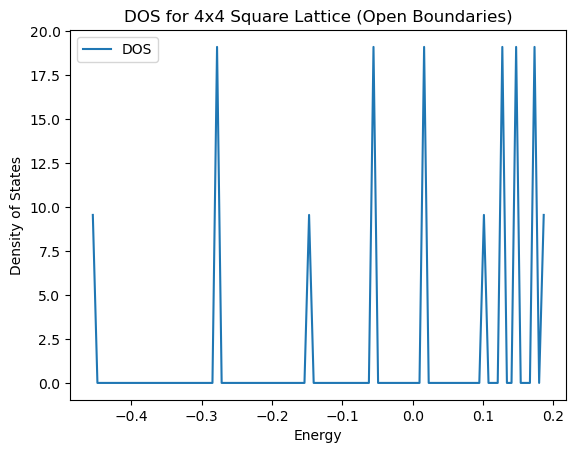

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix

# Parameters
t = 0.1  # Nearest-neighbor hopping
t_prime = 0.05  # Next-nearest-neighbor hopping
L = 4  # Lattice size
N = L * L  # Total number of sites

# Function to convert (i,j) to a single index
def idx(i, j):
    return i * L + j

# Initialize Hamiltonian matrix
H = lil_matrix((N, N), dtype=np.float64)

# Fill the Hamiltonian matrix
for i in range(L):
    for j in range(L):
        # Nearest-neighbor hopping
        for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            ni, nj = i + di, j + dj
            if 0 <= ni < L and 0 <= nj < L:  # Ensure the neighbor is within the lattice
                H[idx(i, j), idx(ni, nj)] = -t
        # Next-nearest-neighbor hopping
        for di, dj in [(-1, -1), (-1, 1), (1, -1), (1, 1)]:
            ni, nj = i + di, j + dj
            if 0 <= ni < L and 0 <= nj < L:  # Ensure the neighbor is within the lattice
                H[idx(i, j), idx(ni, nj)] = -t_prime

# Convert to dense matrix and diagonalize
H = H.toarray()
eigenvalues = np.linalg.eigvalsh(H)

# Calculate DOS
energy_bins = np.linspace(np.min(eigenvalues), np.max(eigenvalues), 100)
dos, _ = np.histogram(eigenvalues, bins=energy_bins, density=True)

# Plot DOS
plt.plot(energy_bins[:-1], dos, label='DOS')
plt.xlabel('Energy')
plt.ylabel('Density of States')
plt.title('DOS for 4x4 Square Lattice (Open Boundaries)')
plt.legend()
plt.show()